In [2]:
palabra1 = 'ST'
palabra2 = 'DS'
ocurrencias1 = []
ocurrencias2 = []
file_DS = open('vardn0507181644_DS.txt', 'w+') #Nombra tu nuevo archivo DS.

file_ST = open('vardn0507181644_ST.txt', 'w+') # Nombra tu nuevo archivo ST.
with open('vardn0507181644.txt') as lineas: # Abre archivo de Escaramujo
    flag=False
    for linea in lineas:
            if flag: 
                ocurrencias2.append(linea)
                flag=False 
            if palabra1 in linea:
                ocurrencias1.append(linea)
                flag=True 
 
       
for i, j in enumerate (ocurrencias1):
    #print(i, j)
    file_ST.write(str(j))

file_ST.close() 

for i, k in enumerate (ocurrencias2):
    #print i, k
    file_DS.write(str(k))

file_DS.close()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dec = open('vardn0507181644_deci.txt','w') # Nombra tu nuevo archivo en decimal.
ST = 'vardn0507181644_DS.txt' # Tu archivo DS del programa de 'Busqueda_ST_DS'.
coincidencias = np.loadtxt(ST,delimiter= ' ',skiprows=2,usecols=[5],dtype=bytes).astype(str)

for i, j in enumerate (coincidencias):  
    k= int(j,16)
    #print i, k
    dec.write(str(k))
    dec.write("\n")
    
dec.close() 


In [7]:

dia_hora_coincidencias = open('vardn0507181644_final_dia.csv','w') # Nombra nuevo archivo final.
noche_hora_coincidencias = open('vardn0507181644_final_noche.csv','w')

dec = 'vardn0507181644_deci.txt' # Llama archivo creado en 'Hexadecimal_Decimal'.
coincidencias = np.loadtxt(dec,delimiter= ' ',usecols=[0],dtype=bytes).astype(str)

ST = 'vardn0507181644_ST.txt' # Llama archivo creado en 'Busqueda_ST_DS'.
hora = np.loadtxt(ST,delimiter= ' ',skiprows=2,usecols=[5],dtype=bytes).astype(str)
fecha = np.loadtxt(ST,delimiter= ' ',skiprows=2,usecols=[6],dtype=bytes).astype(str)

Titulo= 'Fecha,Hora,Coincidencias\n'
#print Titulo
dia_hora_coincidencias.write (str(Titulo))
noche_hora_coincidencias.write (str(Titulo))
print(hora)
for i in range(len(hora)):
    test = int(hora[i])
   # print(hora)
    if 63500<test<192417 : # Fija intervalo de horas para el día
        data = fecha[i] + "," + hora[i] + "," + coincidencias[i] 
        #print(data)
        dia_hora_coincidencias.write(str(data))
        dia_hora_coincidencias.write("\n") 
    else:
        data2 = fecha[i] + "," + hora[i] + "," + coincidencias[i] 
        #print data2
        noche_hora_coincidencias.write(str(data2))
        noche_hora_coincidencias.write("\n") 
        
dia_hora_coincidencias.close()
noche_hora_coincidencias.close()


['214611' '214711' '214811' ... '191141' '191241' '191406']


In [8]:

datos= pd.read_csv('vardn0507181644_final_dia.csv')
datos2= pd.read_csv('vardn0507181644_final_noche.csv')
df=pd.DataFrame(datos)
df2=pd.DataFrame(datos2)



In [9]:
df2.head()

,Fecha,Hora,Coincidencias
0,50718,214611,280
1,50718,214711,562
2,50718,214811,562
3,50718,214911,550
4,50718,215012,539


In [12]:
df2['Coincidencias'].describe()

count    3871.000000
mean      556.231981
std        23.729166
min       280.000000
25%       540.000000
50%       556.000000
75%       572.000000
max       654.000000
Name: Coincidencias, dtype: float64

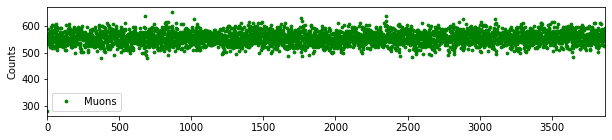

In [14]:

fig, axes = plt.subplots(1,1, figsize=(10,2), sharex=True)
axes =df2['Coincidencias'].plot(marker='.',markersize=5.5, linestyle='None',legend=True,  label='Muons',alpha=1,color='g', figsize=(11, 9), subplots=True)

ax = plt.gca()
ax.set_ylabel('Counts')
#plt.show()
plt.savefig('MuonesTimeseries0507181644.png')

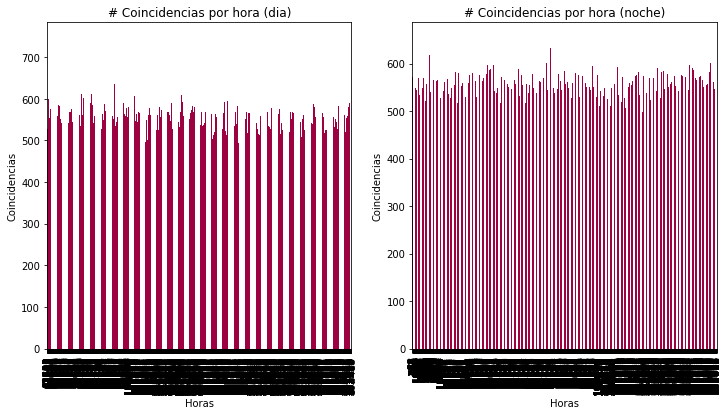

<Figure size 432x288 with 0 Axes>

In [32]:
plt.figure(figsize=(12,6)) # Elige el tamaño de las gráficas
plt.subplot(1,2,1)
df.groupby('Hora')['Coincidencias'].mean().plot(kind='bar',cmap='Spectral', legend=False)
plt.title('# Coincidencias por hora (dia)')
plt.xlabel('Horas')
plt.ylabel('Coincidencias')

plt.subplot(1,2,2)
df2.groupby('Hora')['Coincidencias'].mean().plot(kind='bar',cmap='Spectral', legend=False)
plt.title('# Coincidencias por hora (noche)')
plt.xlabel('Horas')
plt.ylabel('Coincidencias')


plt.show()
plt.savefig("vardn0507181644_fig.png", bbox_inches='tight') #Nombra el archivo de la gráfica


In [9]:
myarray = np.asarray(coincidencias)

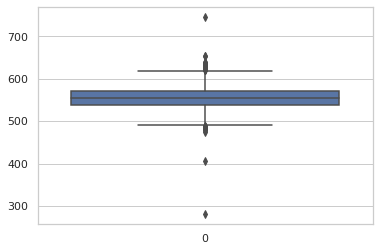

In [16]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(data=myarray)
plt.savefig("coincidencias.png", bbox_inches='tight')